In [1]:
%load_ext autoreload
%autoreload 2
import pyro.distributions as dist
import torch

import matplotlib.pyplot as plt
from dotenv import dotenv_values
from scipy import stats
from torch import Tensor

from bayesian_stats.distributions import KDEDistribution

# Latent distribution

In [2]:
latent_dist = dist.Beta(3,2)

torch.manual_seed(1234)
num_samples = 2**15
batch_size = ()
samples = latent_dist.sample((num_samples, *batch_size))
samples.shape

torch.Size([32768])

# Kernel Density Estimated Distribution

In [5]:
kde_dist = KDEDistribution(
    samples=samples,
    bounds=(0., 1.),
)
kde_dist

KDEDistribution()

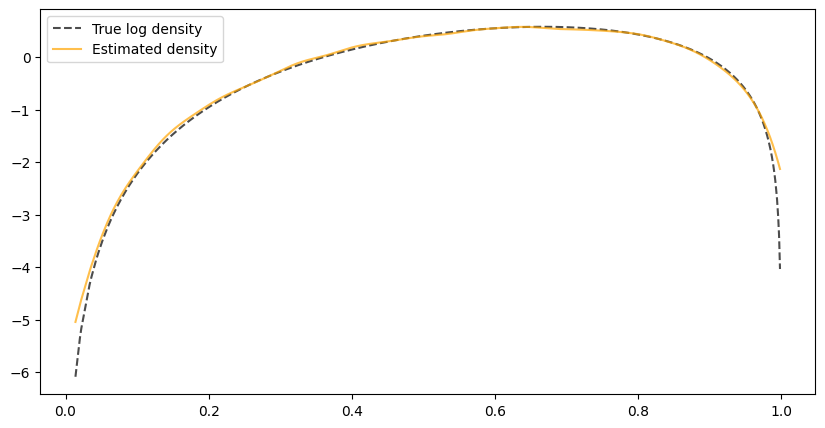

In [10]:
_, ax = plt.subplots(figsize=(10,5))
ax.plot(
    kde_dist.samples, 
    latent_dist.log_prob(kde_dist.samples), 
    color="black", 
    alpha=0.7,
    linestyle="--", 
    label="True log density"
)
ax.plot(
    kde_dist.samples, 
    kde_dist.sample_density, 
    color="orange", 
    alpha=0.7, 
    label="Estimated density",
)
ax.legend();

## Sample from distribution

In [11]:
kde_dist.sample((3,4,2))

tensor([[[0.8526, 0.3831],
         [0.8119, 0.5838],
         [0.3662, 0.7764],
         [0.7211, 0.2652]],

        [[0.3595, 0.7908],
         [0.5407, 0.3811],
         [0.7805, 0.6668],
         [0.8841, 0.8905]],

        [[0.7893, 0.3518],
         [0.3593, 0.4605],
         [0.7977, 0.3328],
         [0.7872, 0.7862]]])

## Estimate density of new values

In [28]:
new_values = latent_dist.sample((1_024,))

d_true = latent_dist.log_prob(new_values)
d_interp = kde_dist.log_prob(new_values, interpolate=True)
d_est = kde_dist.log_prob(new_values, interpolate=False)

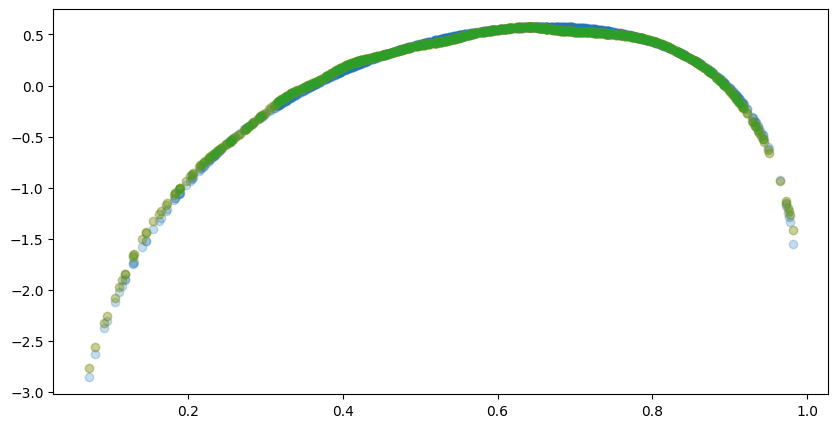

In [29]:
_, ax = plt.subplots(figsize=(10,5))
ax.scatter(new_values, d_true, alpha=0.25)
ax.scatter(new_values, d_interp, alpha=0.25)
ax.scatter(new_values, d_est, alpha=0.25)

In [33]:
d_true[:5],d_interp[:5],d_est[:5]

(tensor([0.5202, 0.5394, 0.5294, 0.1138, 0.0789]),
 tensor([0.5146, 0.5111, 0.5264, 0.1487, 0.1062]),
 tensor([0.5146, 0.5111, 0.5264, 0.1487, 0.1062]))

In [36]:
d_interp = kde_dist.log_prob(latent_dist.sample((5,3,10,2,)), interpolate=True)
d_interp.shape

torch.Size([5, 3, 10, 2])